# **Association Rule Mining**

# Lots of of help from chatGPT

In [ ]:
!pip install mlxtend


In [ ]:
import pandas as pd

In [ ]:
!pip install Faker


In [7]:
from mlxtend.frequent_patterns import apriori




# **Creating fake data:**

In [ ]:


# Create the DataFrame with the data- fake data
data = pd.DataFrame({
    "Transaction ID": [1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5],
    "Product": ["Item A", "Item B", "Item C", "Item A", "Item C", "Item B", "Item D", "Item A", "Item C", "Item D", "Item B", "Item C", "Item E"]
})

# Save the DataFrame as a CSV file
data.to_csv("association_rule_data.csv", index=False)

In [ ]:
import pandas as pd

# Load the transaction data
data = pd.read_csv("association_rule_data.csv")

# Perform one-hot encoding
transaction_encoded = pd.get_dummies(data, columns=["Product"], prefix="", prefix_sep="")

# grouping by Id
transaction_encoded = transaction_encoded.groupby("Transaction ID").sum()


In [ ]:
from mlxtend.frequent_patterns import apriori

# min support
min_support = 0.2

# Frequent items
frequent_itemsets = apriori(transaction_encoded, min_support=min_support, use_colnames=True)


In [ ]:
from mlxtend.frequent_patterns import association_rules

# min threshhold
min_threshold = 0.5

#  rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)


In [ ]:
top_rules = rules.sort_values(by=["lift", "confidence"], ascending=[False, False])
print(top_rules.head())


In [ ]:
#be add justed(values)
min_confidence = 0.5
min_support = 0.01
min_lift = 1.5
filtered_rules = rules[(rules["lift"] >= min_lift) & (rules["confidence"] >= min_confidence) & (rules["support"] >= min_support)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


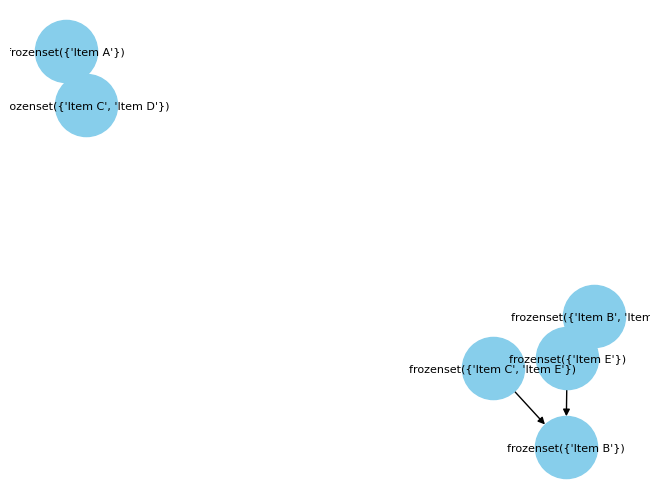

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

# association graph
G = nx.DiGraph()

for i, row in filtered_rules.iterrows():
    G.add_edge(row["antecedents"], row["consequents"], weight=row["lift"])

# Plot association graph
pos = nx.spring_layout(G, seed=42)
labels = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, labels=labels, font_size=8, node_size=2000, node_color="skyblue")
plt.show()
